In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_csv("../cybersecurity_attacks.csv")

In [6]:
df.head()

,Timestamp,Source IP Address,Destination IP Address,Source Port,Destination Port,Protocol,Packet Length,Packet Type,Traffic Type,Payload Data,...,Action Taken,Severity Level,User Information,Device Information,Network Segment,Geo-location Data,Proxy Information,Firewall Logs,IDS/IPS Alerts,Log Source
0,2023-05-30 06:33:58,103.216.15.12,84.9.164.252,31225,17616,ICMP,503,Data,HTTP,Qui natus odio asperiores nam. Optio nobis ius...,...,Logged,Low,Reyansh Dugal,Mozilla/5.0 (compatible; MSIE 8.0; Windows NT ...,Segment A,"Jamshedpur, Sikkim",150.9.97.135,Log Data,NaN,Server
1,2020-08-26 07:08:30,78.199.217.198,66.191.137.154,17245,48166,ICMP,1174,Data,HTTP,Aperiam quos modi officiis veritatis rem. Omni...,...,Blocked,Low,Sumer Rana,Mozilla/5.0 (compatible; MSIE 8.0; Windows NT ...,Segment B,"Bilaspur, Nagaland",NaN,Log Data,NaN,Firewall
2,2022-11-13 08:23:25,63.79.210.48,198.219.82.17,16811,53600,UDP,306,Control,HTTP,Perferendis sapiente vitae soluta. Hic delectu...,...,Ignored,Low,Himmat Karpe,Mozilla/5.0 (compatible; MSIE 9.0; Windows NT ...,Segment C,"Bokaro, Rajasthan",114.133.48.179,Log Data,Alert Data,Firewall
3,2023-07-02 10:38:46,163.42.196.10,101.228.192.255,20018,32534,UDP,385,Data,HTTP,Totam maxime beatae expedita explicabo porro l...,...,Blocked,Medium,Fateh Kibe,Mozilla/5.0 (Macintosh; PPC Mac OS X 10_11_5; ...,Segment B,"Jaunpur, Rajasthan",NaN,NaN,Alert Data,Firewall
4,2023-07-16 13:11:07,71.166.185.76,189.243.174.238,6131,26646,TCP,1462,Data,DNS,Odit nesciunt dolorem nisi iste iusto. Animi v...,...,Blocked,Low,Dhanush Chad,Mozilla/5.0 (compatible; MSIE 5.0; Windows NT ...,Segment C,"Anantapur, Tripura",149.6.110.119,NaN,Alert Data,Firewall


In [7]:
df.describe()

,Source Port,Destination Port,Packet Length,Anomaly Scores
count,40000.000000,40000.000000,40000.000000,40000.000000
mean,32970.356450,33150.868650,781.452725,50.113473
std,18560.425604,18574.668842,416.044192,28.853598
min,1027.000000,1024.000000,64.000000,0.000000
25%,16850.750000,17094.750000,420.000000,25.150000
50%,32856.000000,33004.500000,782.000000,50.345000
75%,48928.250000,49287.000000,1143.000000,75.030000
max,65530.000000,65535.000000,1500.000000,100.000000


In [8]:
df.isna().sum() # missing values

Timestamp                     0
Source IP Address             0
Destination IP Address        0
Source Port                   0
Destination Port              0
Protocol                      0
Packet Length                 0
Packet Type                   0
Traffic Type                  0
Payload Data                  0
Malware Indicators        20000
Anomaly Scores                0
Alerts/Warnings           20067
Attack Type                   0
Attack Signature              0
Action Taken                  0
Severity Level                0
User Information              0
Device Information            0
Network Segment               0
Geo-location Data             0
Proxy Information         19851
Firewall Logs             19961
IDS/IPS Alerts            20050
Log Source                    0
dtype: int64

In [9]:
type(df["Timestamp"])

pandas.core.series.Series

**Descriptive Stats on Attack Type**

In [10]:
df["Attack Type"].value_counts() # balanced

Attack Type
DDoS         13428
Malware      13307
Intrusion    13265
Name: count, dtype: int64

**Quick Analysis on Missing Values**

In [11]:
df["Malware Indicators"].unique()

array(['IoC Detected', nan], dtype=object)

In [12]:
df["Alerts/Warnings"].unique()

array([nan, 'Alert Triggered'], dtype=object)

In [13]:
df["Firewall Logs"].unique()

array(['Log Data', nan], dtype=object)

In [14]:
df["IDS/IPS Alerts"].unique()

array([nan, 'Alert Data'], dtype=object)

Conclusion: These columns seem to be binary and hence we can replace them with binary values to indicate whether an event occurred.

**Some Feature Engineering and dealing with missing values**

In [15]:
df.loc[df["Malware Indicators"].notna(),"Malware Indicators"] = 1
df.loc[df["Malware Indicators"].isna(),"Malware Indicators"] = 0

In [16]:
df.loc[df["Alerts/Warnings"].notna(),"Alerts/Warnings"] = 1
df.loc[df["Alerts/Warnings"].isna(),"Alerts/Warnings"] = 0

In [17]:
df.loc[df["Firewall Logs"].notna(),"Firewall Logs"] = 1
df.loc[df["Firewall Logs"].isna(),"Firewall Logs"] = 0

In [18]:
df.loc[df["IDS/IPS Alerts"].notna(),"IDS/IPS Alerts"] = 1
df.loc[df["IDS/IPS Alerts"].isna(),"IDS/IPS Alerts"] = 0

In [19]:
# for proxy let's check if proxy is being used or not (creating and populating new column: proxy_used)
df.loc[df["Proxy Information"].notna(),"proxy_used"] = 1
df.loc[df["Proxy Information"].isna(),"proxy_used"] = 0

**Analysis for Binary fields: Malware Indicators, Alerts/Warnings, Firewall Logs, IDS/IPS Alerts, proxy_used**

<Axes: xlabel='Attack Type', ylabel='count'>

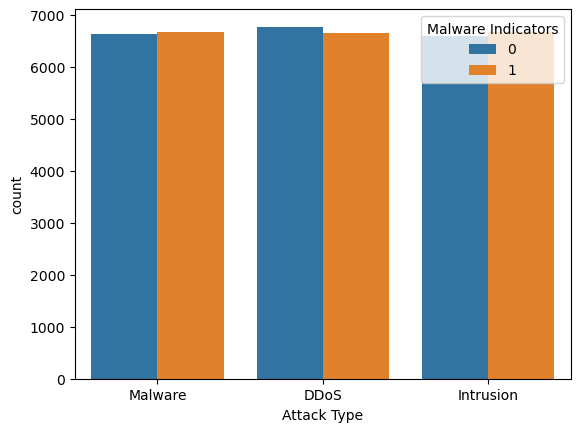

In [20]:
sns.countplot(x="Attack Type", hue="Malware Indicators", data=df) # isn't this supposed to be higher for Attack Type = Malware

<Axes: xlabel='Attack Type', ylabel='count'>

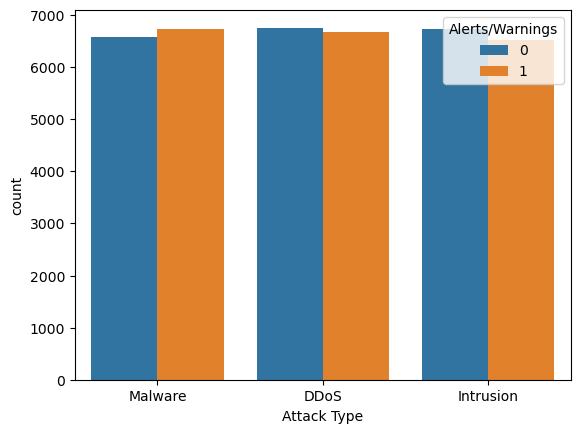

In [21]:
sns.countplot(x="Attack Type", hue="Alerts/Warnings", data=df)

<Axes: xlabel='Attack Type', ylabel='count'>

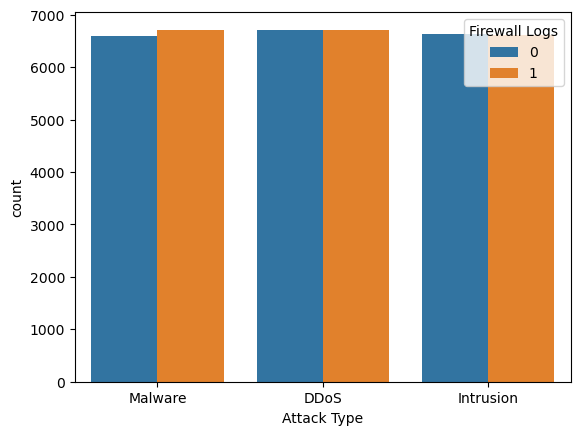

In [22]:
sns.countplot(x="Attack Type", hue="Firewall Logs", data=df)

<Axes: xlabel='Attack Type', ylabel='count'>

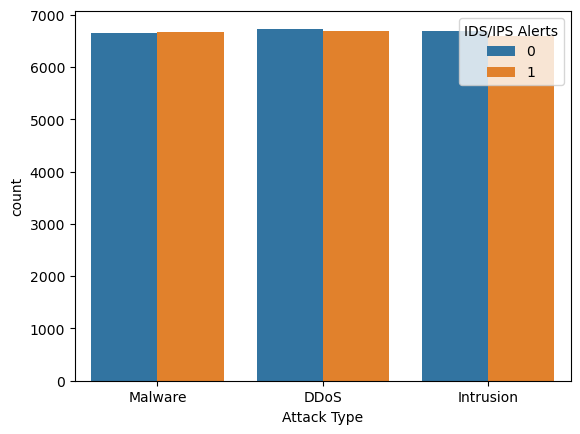

In [23]:
sns.countplot(x="Attack Type", hue="IDS/IPS Alerts", data=df)

<Axes: xlabel='Attack Type', ylabel='count'>

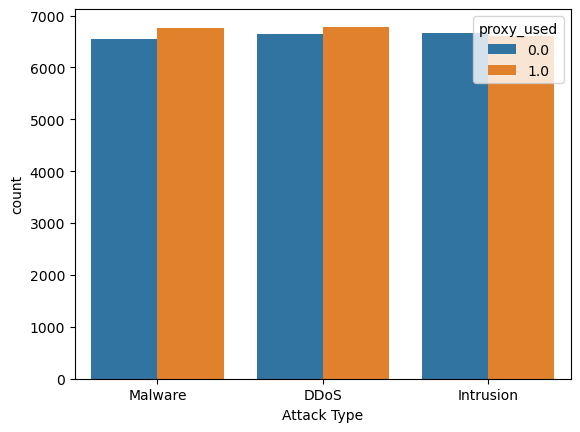

In [24]:
sns.countplot(x="Attack Type", hue="proxy_used", data=df)

Discussions:<br>
These fields may have been populated AFTER an attack was detected. This might cause "data leakage".<br>
The plots show an almost equal distribution.

**Analysis for Packet Length**

In [25]:
df["Packet Length"].describe()

count    40000.000000
mean       781.452725
std        416.044192
min         64.000000
25%        420.000000
50%        782.000000
75%       1143.000000
max       1500.000000
Name: Packet Length, dtype: float64

In [26]:
df["Packet Length"].skew()

np.float64(-0.0004816733454764746)

In [27]:
df["Packet Length"].kurt()

np.float64(-1.20791508286176)

In [28]:
df["Packet Length"].corr(df["Anomaly Scores"])

np.float64(-0.003598602119422111)

In [29]:
severity_map = {
    "Low": 1,
    "Medium": 2,
    "High": 3
}
df["Packet Length"].corr(df["Severity Level"].map(severity_map))

np.float64(0.0008735628531050748)

<Axes: xlabel='Packet Length', ylabel='Count'>

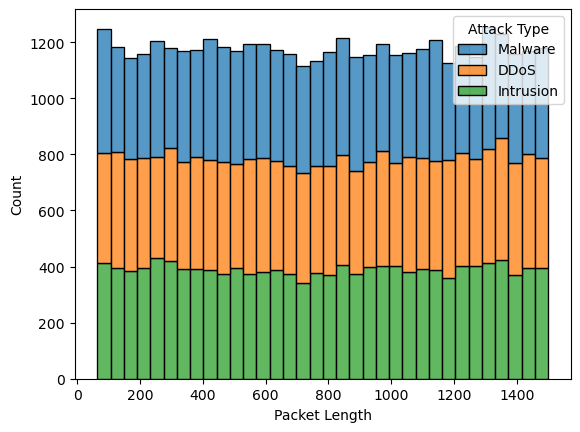

In [30]:
sns.histplot(x="Packet Length", hue="Attack Type", multiple="stack", data=df) #mostly uniform

In [31]:
df.groupby("Attack Type")["Packet Length"].describe()

,count,mean,std,min,25%,50%,75%,max
Attack Type,,,,,,,,
DDoS,13428.0,785.348749,416.685412,64.0,424.0,786.0,1150.0,1500.0
Intrusion,13265.0,780.924387,418.209936,64.0,412.0,785.0,1145.0,1500.0
Malware,13307.0,778.047945,413.221127,64.0,426.0,777.0,1135.0,1500.0


<Axes: xlabel='Attack Type', ylabel='Packet Length'>

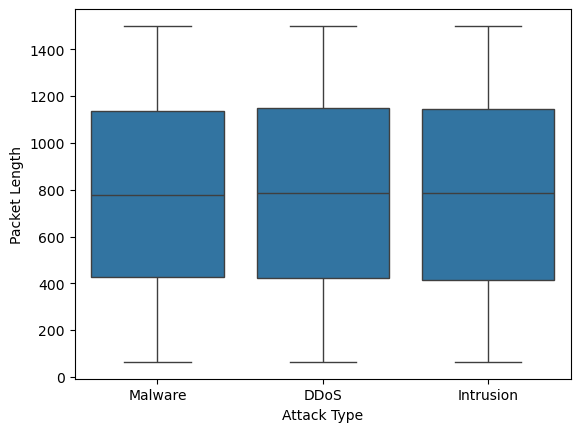

In [32]:
sns.boxplot(x="Attack Type", y="Packet Length", data=df) # seems almost identical (is packet length relevant?)

Conclusion: Packet Length alone does NOT influence Attack Type

**Analysis for Traffic Type**

In [34]:
df["Traffic Type"].value_counts() # balanced

Traffic Type
DNS     13376
HTTP    13360
FTP     13264
Name: count, dtype: int64

<Axes: xlabel='Attack Type', ylabel='count'>

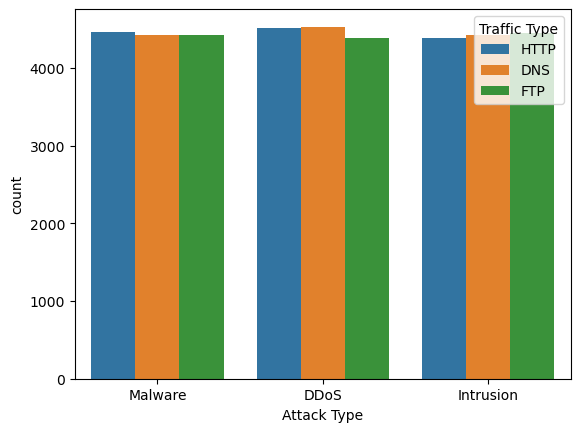

In [35]:
sns.countplot(x="Attack Type", hue="Traffic Type", data=df) # also near identical

**Analysis for Anomaly Score**

In [36]:
df["Anomaly Scores"].describe()

count    40000.000000
mean        50.113473
std         28.853598
min          0.000000
25%         25.150000
50%         50.345000
75%         75.030000
max        100.000000
Name: Anomaly Scores, dtype: float64

In [37]:
df["Anomaly Scores"].skew()

np.float64(-0.011169110441272242)

In [38]:
df["Anomaly Scores"].kurt()

np.float64(-1.1971181710247114)

<Axes: xlabel='Anomaly Scores', ylabel='Count'>

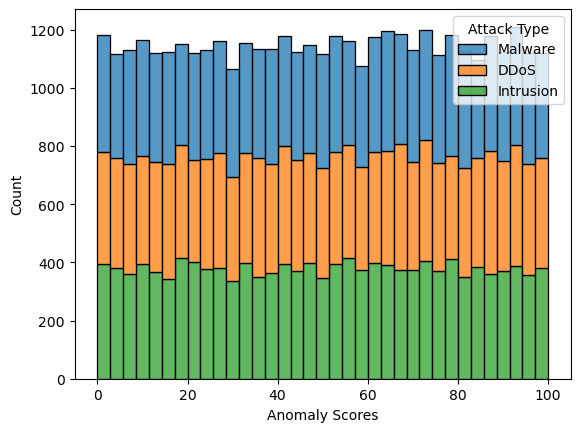

In [ ]:
sns.histplot(x="Anomaly Scores", hue="Attack Type", multiple="stack", data=df)

<Axes: xlabel='Anomaly Scores', ylabel='Density'>

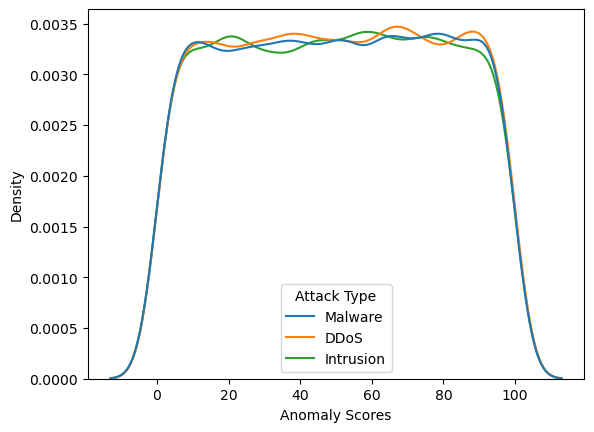

In [ ]:
sns.kdeplot(x="Anomaly Scores", hue="Attack Type", data=df)

<Axes: xlabel='Attack Type', ylabel='Anomaly Scores'>

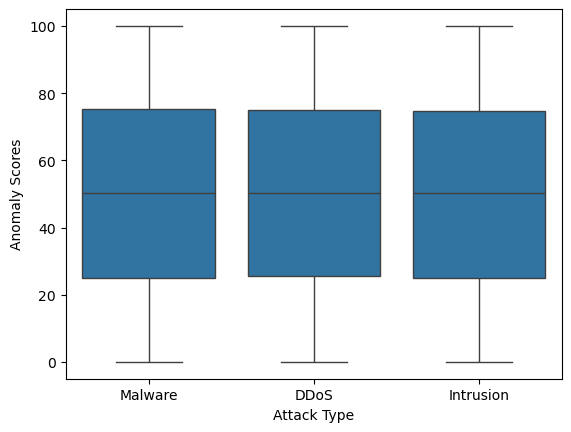

In [40]:
sns.boxplot(x="Attack Type", y="Anomaly Scores", data=df)

**Analysis for Attack Signature**

In [41]:
df["Attack Signature"].value_counts()

Attack Signature
Known Pattern A    20076
Known Pattern B    19924
Name: count, dtype: int64

<Axes: xlabel='Attack Type', ylabel='count'>

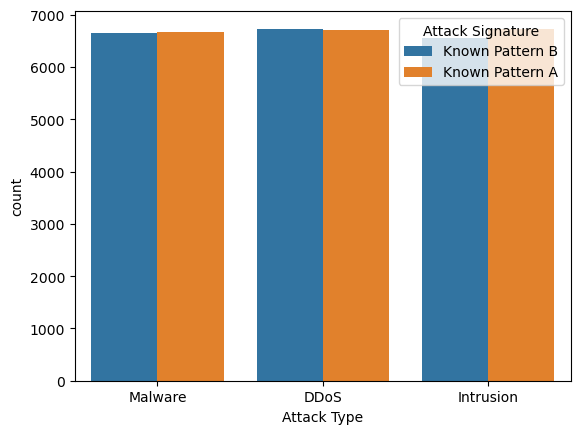

In [42]:
sns.countplot(x="Attack Type", hue="Attack Signature", data=df)

**Analysis of User Information**

In [43]:
df["User Information"].value_counts()

User Information
Heer Lad            6
Ishaan Chaudhari    6
Akarsh Tripathi     5
Ishita Chaudry      5
Aradhya Chaudhry    5
                   ..
Ishita Dugal        1
Lakshay Handa       1
Zara Bandi          1
Yakshit Wadhwa      1
Jayan Baral         1
Name: count, Length: 32389, dtype: int64

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15],
 [Text(0, 0, 'Azad Kala'),
  Text(1, 0, 'Nakul Krishna'),
  Text(2, 0, 'Heer Lad'),
  Text(3, 0, 'Urvi Dara'),
  Text(4, 0, 'Akarsh Tripathi'),
  Text(5, 0, 'Elakshi Koshy'),
  Text(6, 0, 'Aradhya Chaudhry'),
  Text(7, 0, 'Tara Madan'),
  Text(8, 0, 'Urvi Mani'),
  Text(9, 0, 'Ishaan Chaudhari'),
  Text(10, 0, 'Yasmin Ghose'),
  Text(11, 0, 'Mahika Sachdev'),
  Text(12, 0, 'Baiju Dugar'),
  Text(13, 0, 'Jayan Kala'),
  Text(14, 0, 'Vritika Dara'),
  Text(15, 0, 'Ishita Chaudry')])

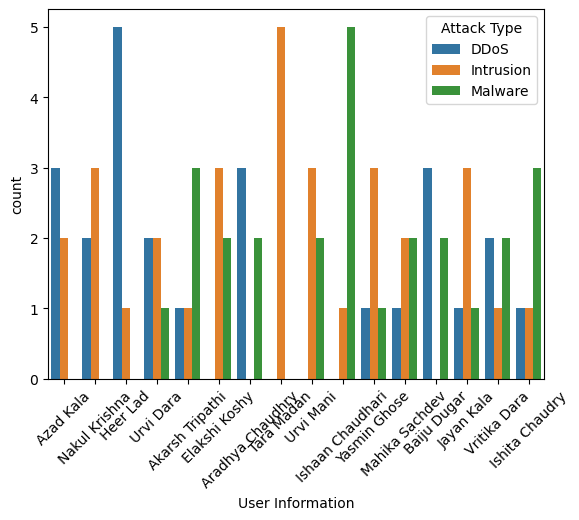

In [44]:
user_counts = df["User Information"].value_counts()
user_counts_duplicates = user_counts[user_counts > 4].index
df_duplicate_users = df[df["User Information"].isin(user_counts_duplicates)]
sns.countplot(x="User Information", hue="Attack Type", data=df_duplicate_users)
plt.xticks(rotation=45)
# Okay but can we use this?

**Analysis of Device Information**

In [45]:
df["Device Information"].value_counts()

Device Information
Mozilla/5.0 (compatible; MSIE 6.0; Windows NT 6.2; Trident/3.0)                                                                                       35
Mozilla/5.0 (compatible; MSIE 5.0; Windows 98; Trident/4.1)                                                                                           34
Mozilla/5.0 (compatible; MSIE 6.0; Windows CE; Trident/4.0)                                                                                           33
Mozilla/5.0 (compatible; MSIE 7.0; Windows NT 6.0; Trident/3.0)                                                                                       31
Mozilla/5.0 (compatible; MSIE 5.0; Windows NT 5.2; Trident/4.1)                                                                                       31
                                                                                                                                                      ..
Mozilla/5.0 (iPhone; CPU iPhone OS 12_4_8 like Mac OS X) AppleW

([0, 1, 2, 3, 4],
 [Text(0, 0, 'Mozilla/5.0 (compatible; MSIE 6.0; Windows CE; Trident/4.0)'),
  Text(1, 0, 'Mozilla/5.0 (compatible; MSIE 5.0; Windows 98; Trident/4.1)'),
  Text(2, 0, 'Mozilla/5.0 (compatible; MSIE 5.0; Windows NT 5.2; Trident/4.1)'),
  Text(3, 0, 'Mozilla/5.0 (compatible; MSIE 7.0; Windows NT 6.0; Trident/3.0)'),
  Text(4, 0, 'Mozilla/5.0 (compatible; MSIE 6.0; Windows NT 6.2; Trident/3.0)')])

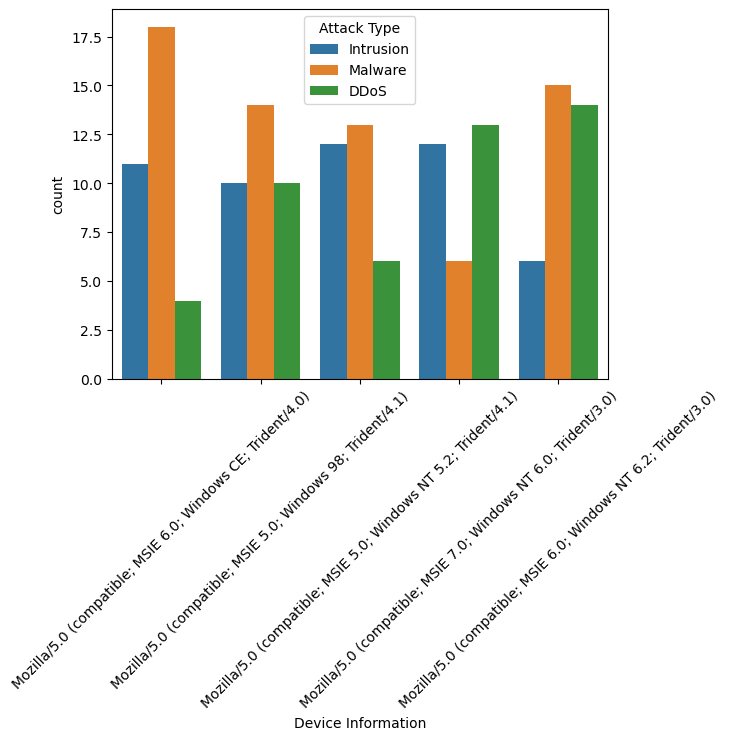

In [46]:
device_counts = df["Device Information"].value_counts()
device_counts_duplicates = device_counts[device_counts > 30].index
df_duplicate_devices = df[df["Device Information"].isin(device_counts_duplicates)]
sns.countplot(x="Device Information", hue="Attack Type", data=df_duplicate_devices)
plt.xticks(rotation=45)
# We need to "atomize" this and run analysis again

**Analysis for Network Segment**

In [47]:
df["Network Segment"].value_counts()

Network Segment
Segment C    13408
Segment B    13319
Segment A    13273
Name: count, dtype: int64

<Axes: xlabel='Attack Type', ylabel='count'>

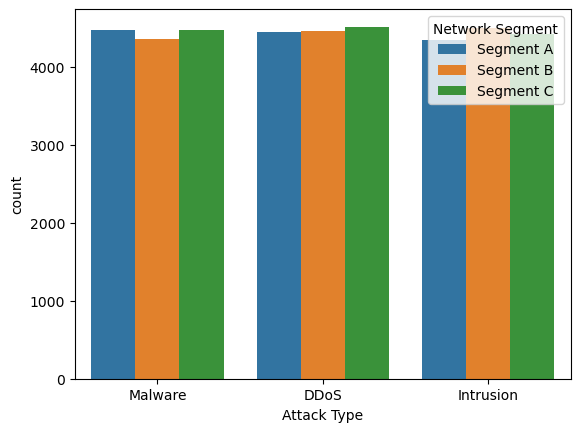

In [48]:
sns.countplot(x="Attack Type", hue="Network Segment", data=df)

**Analysis for Packet Length + Traffic Type**

<Axes: xlabel='Traffic Type', ylabel='Packet Length'>

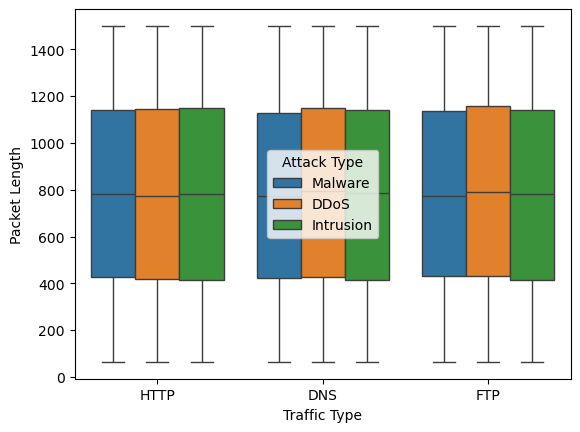

In [49]:
sns.boxplot(x="Traffic Type", y="Packet Length", hue="Attack Type", data=df)

**Analysis for Anomaly Score + Traffic Type**

<Axes: xlabel='Traffic Type', ylabel='Anomaly Scores'>

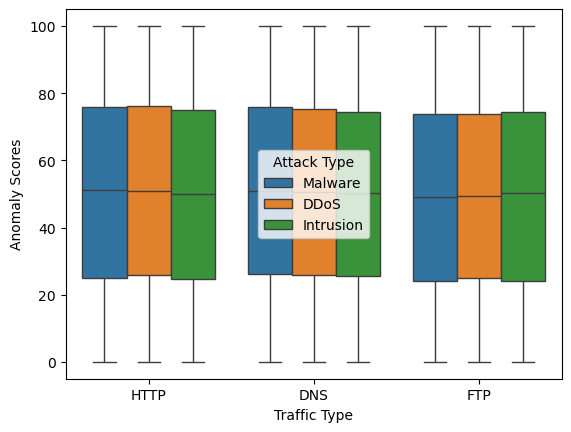

In [50]:
sns.boxplot(x="Traffic Type", y="Anomaly Scores", hue="Attack Type", data=df)

**Analysis for Network Segment + Traffic Type** 

<Axes: xlabel='Traffic Type', ylabel='count'>

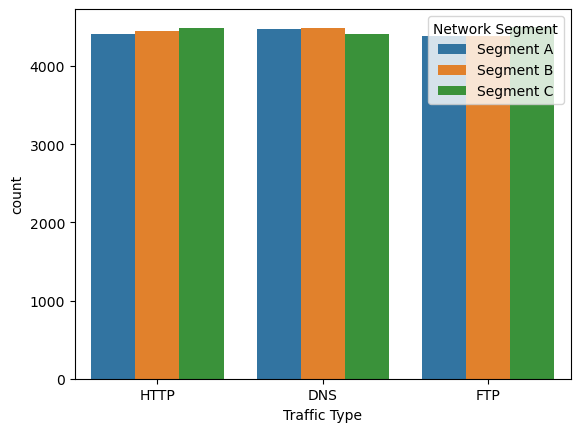

In [51]:
sns.countplot(x="Traffic Type", hue="Network Segment", data=df)

**Feature Engineering for Device Information**

Device Information is currently a long string with many details. We will split this into:<br>
1. device_type<br>
2. os_family<br>
3. os_version<br>
4. browser<br>
5. browser_version<br>
6. browser_full<br>

In [52]:
from user_agents import parse

def split_device_info(info):
    # we use a user agent parser to split this
    ua = parse(info)
    device_type = ""
    if ua.is_tablet:
        device_type = "tablet"
    elif ua.is_mobile:
        device_type = "mobile"
    else:
        device_type = "pc"
    os_family = ua.os.family or np.nan
    os_version = ua.os.version or np.nan
    browser = ua.browser.family or np.nan
    browser_version = ua.browser.version_string or np.nan
    browser_full = browser.strip() + " " + browser_version.strip() if browser else np.nan

    return pd.Series([device_type, os_family, os_version, browser, browser_version, browser_full])

df[["device_type", "os_family", "os_version", "browser", "browser_version", "browser_full"]] = df["Device Information"].apply(split_device_info)

**Analysis for parsed Device Information**

<Axes: xlabel='device_type', ylabel='count'>

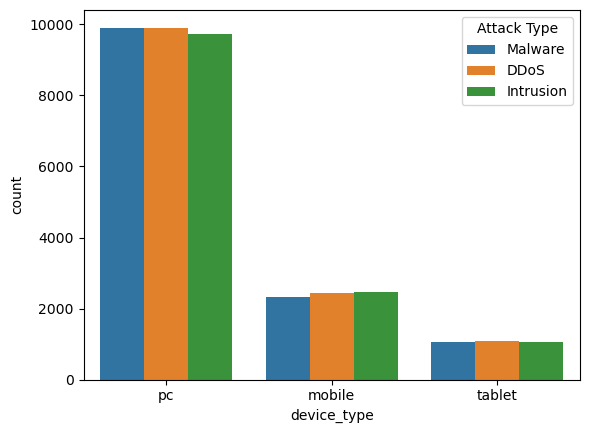

In [53]:
sns.countplot(x="device_type", hue="Attack Type", data=df)

<Axes: xlabel='os_family', ylabel='count'>

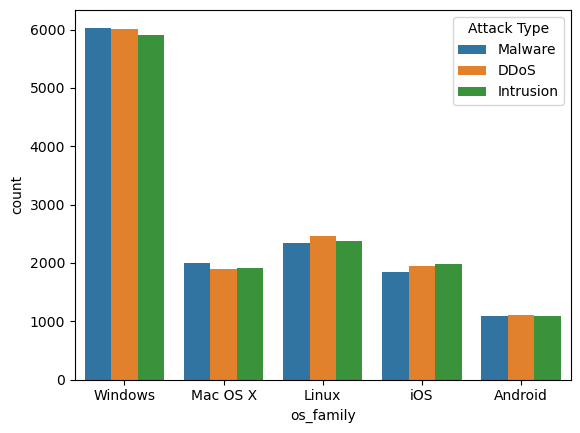

In [54]:
sns.countplot(x="os_family", hue="Attack Type", data=df)

([0, 1, 2, 3, 4, 5, 6, 7, 8],
 [Text(0, 0, 'IE'),
  Text(1, 0, 'Firefox'),
  Text(2, 0, 'Opera'),
  Text(3, 0, 'Chrome'),
  Text(4, 0, 'Safari'),
  Text(5, 0, 'Mobile Safari'),
  Text(6, 0, 'Firefox iOS'),
  Text(7, 0, 'Chrome Mobile iOS'),
  Text(8, 0, 'Firefox Mobile')])

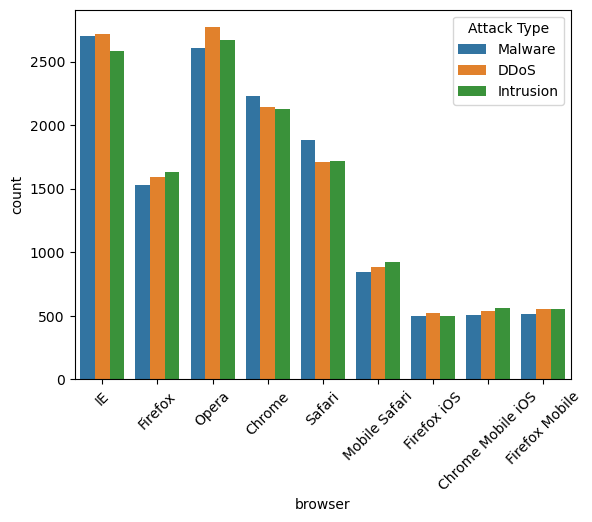

In [55]:
sns.countplot(x="browser", hue="Attack Type", data=df)
plt.xticks(rotation=45)